<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
بهار ۱۴۰۱
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین عملی چهار
            	<br/>
			</font>
طراحان: یاسمن زلفی موصلو و مهرانه نجفی 
			<br/><br/> 
موعد تحویل: 24 خرداد 
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما انتظار می‌رود تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/>
                افرادی که در تمرین کمک کردند: محمد مهدی صادقی
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            الگوریتم برتر
        </font>
        <hr>
             شرکت آپارات یک الگوریتم جدید (الگوریتم B) برای سیستم توصیه‌گر (recommender system) ویدیو خود توسعه داده است. 
        مسئولان شرکت می‌خواهند بررسی کنند که کارایی الگوریتم جدید در مقایسه با الگوریتم قبلی (الگوریتم A) چگونه است و 
        آیا تفاوت قابل توجهی میان این دو وجود دارد یا خیر. <br/>
        برای این منظور تصمیم گرفتند که برای مدت 15 روز نیمی از ترافیک از الگوریتم جدید و نیم دیگر آن از الگوریتم قبلی استفاده کند و میزان کلیک کاربران بر روی 
        فیلم‌های پیشنهاد شده توسط این دو الگوریتم با یکدیگر مقایسه شود.
        نتایج این آزمون در فایل AB_test.csv آمده است.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             لود کردن داده:
    </font>
</div>

In [1]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=8)
AB_test_data <- read.csv("AB_test.csv", header=TRUE)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             می‌خواهیم به کمک آزمون T تصمیم بگیریم که آیا الگوریتم B را جایگزین الگوریتم A کنیم یا خیر.<br/>
        الف) فرض صفر و فرض یک را معرفی کنید.
    </font>
</div>

In [2]:
# H0: A algorithm does the same job (in terms of quality) as B
# H1: B algorithm is better than A

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             ب) آزمون T را انجام داده و p-value را به‌دست آورید. با $\alpha = 0.05$ آیا می‌توان گفت الگوریتم B بهتر از A است؟
    </font>
</div>

In [3]:
a_clicks <- AB_test_data[AB_test_data$algorithm == "A", ]$clicks_number
b_clicks <- AB_test_data[AB_test_data$algorithm == "B", ]$clicks_number
result <- t.test(x = b_clicks, y = a_clicks, alternative = "greater", paired = FALSE)
print(result)
cat("Difference in means is", mean(b_clicks) - mean(a_clicks), "\n")
if (result$p.value > 0.05) {
    print("We can't reject null hypothesis (we cant say b is better than a)")
} else {
    print("We have rejected null hypothesis (b is better than a)")
}


	Welch Two Sample t-test

data:  b_clicks and a_clicks
t = 1.575, df = 26.373, p-value = 0.06359
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.361642       Inf
sample estimates:
mean of x mean of y 
 1058.400  1029.733 

Difference in means is 28.66667 
[1] "We can't reject null hypothesis (we cant say b is better than a)"


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال آزمون جایگشت را به گونه‌ای پیاده‌سازی کنید که n مرحله، در هر مرحله یک جایگشت تصادفی از سطرها را در نظر بگیرد و اختلاف دو الگوریتم A و B را به
        دست آورد. P-value را برای این آزمون محاسبه کرده و با حالت قبل مقایسه کنید.
    </font>
</div>

p-value is 0.061 


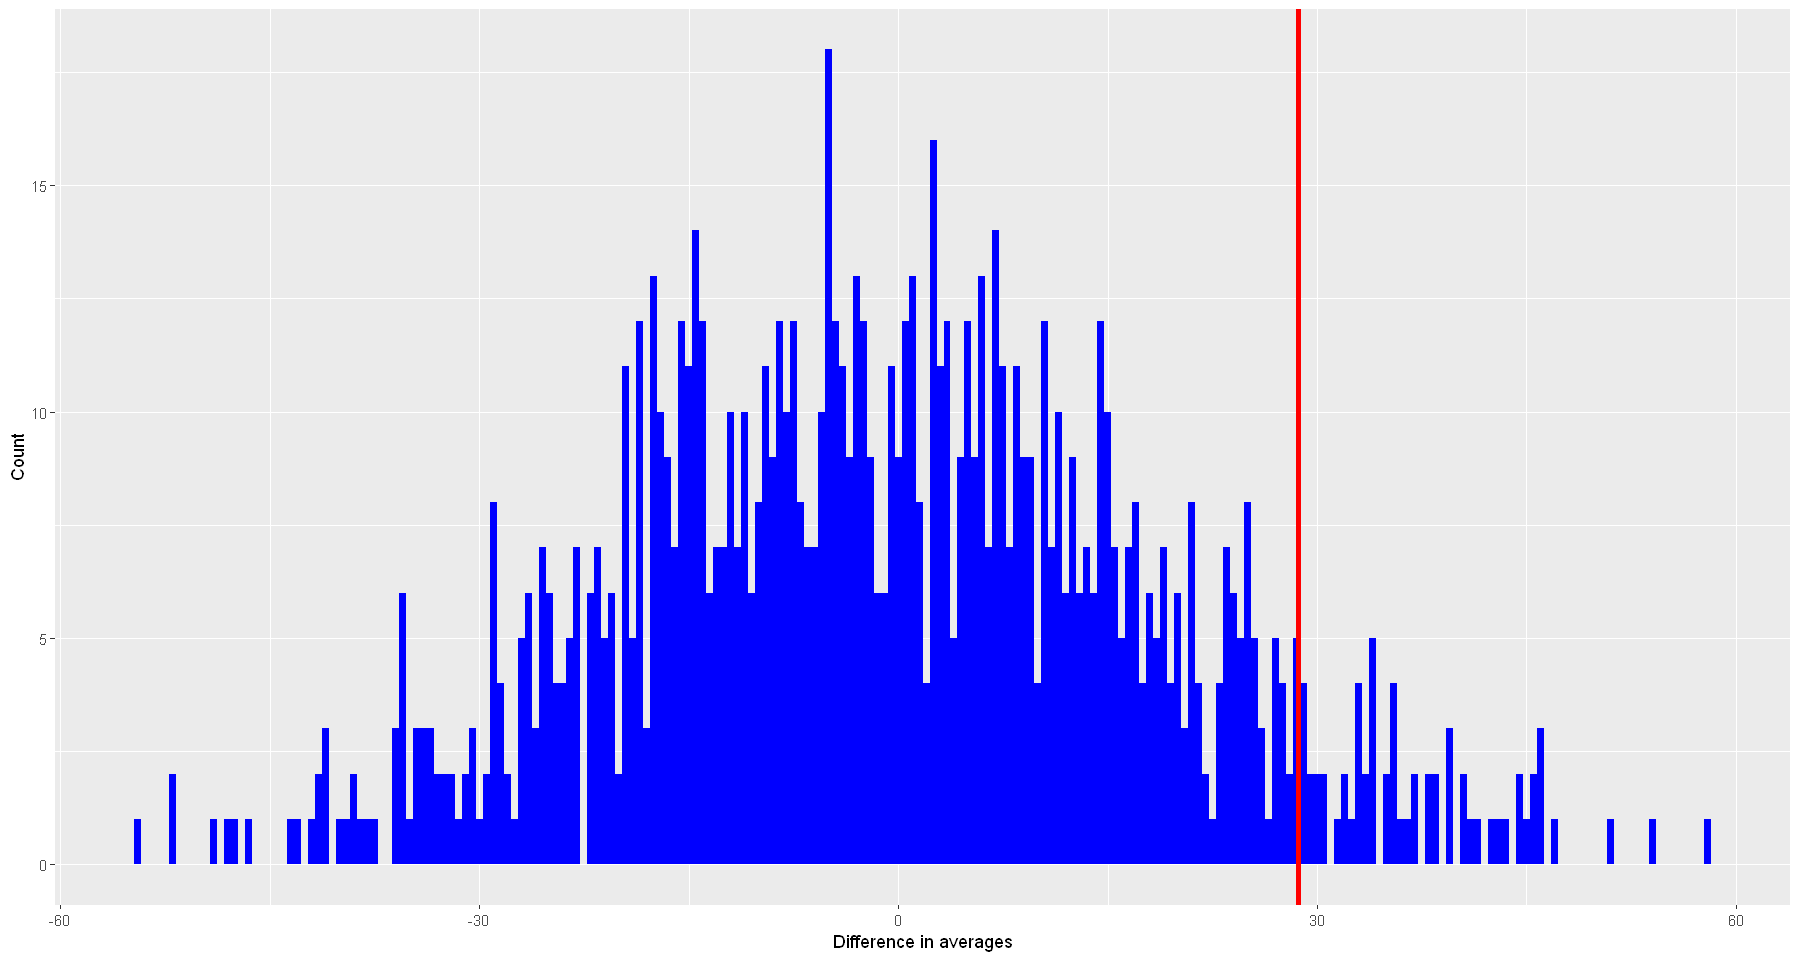

In [4]:
n <- 1000
simple_mean_diff <- mean(b_clicks) - mean(a_clicks)
diffs <- sapply(1:n, function(i) {
    combined <- sample(c(a_clicks, b_clicks))
    new_a <- combined[1:length(a_clicks)]
    new_b <- combined[(length(a_clicks) + 1):length(combined)]
    return(mean(new_a) - mean(new_b))
})
print(ggplot(as.data.frame(diffs), aes(x = diffs)) +
    geom_histogram(binwidth = 0.5, fill = I("blue")) +
    geom_vline(xintercept = simple_mean_diff, color = "red", size = 1.5) +
    labs(x = "Difference in averages", y = "Count"))
cat("p-value is", length(diffs[diffs >= simple_mean_diff]) / length(diffs), "\n")

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            واکسیناسیون
        </font>
        <hr>
             در فایل vaccination.csv اطلاعات مربوط به سن و نوع واکسن تزریق شده به افراد مختلف آمده است.
        گروه سنی افراد را به صورت زیر تعریف می‌کنیم:<br/>
        گروه سنی نوجوان : $12 \leq age < 18$ <br/>
        گروه سنی جوان : $18 \leq age < 40$ <br/>
        گروه سنی بزرگسال : $40 \leq age < 70$ <br/>
        گروه سنی سالمند : $70 \leq age$ <br/>
        نموداری رسم کنید که نشان دهد در هر گروه سنی چند نفر از هر نوع واکسن تزریق کرده‌اند. 
    </font>
</div>


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




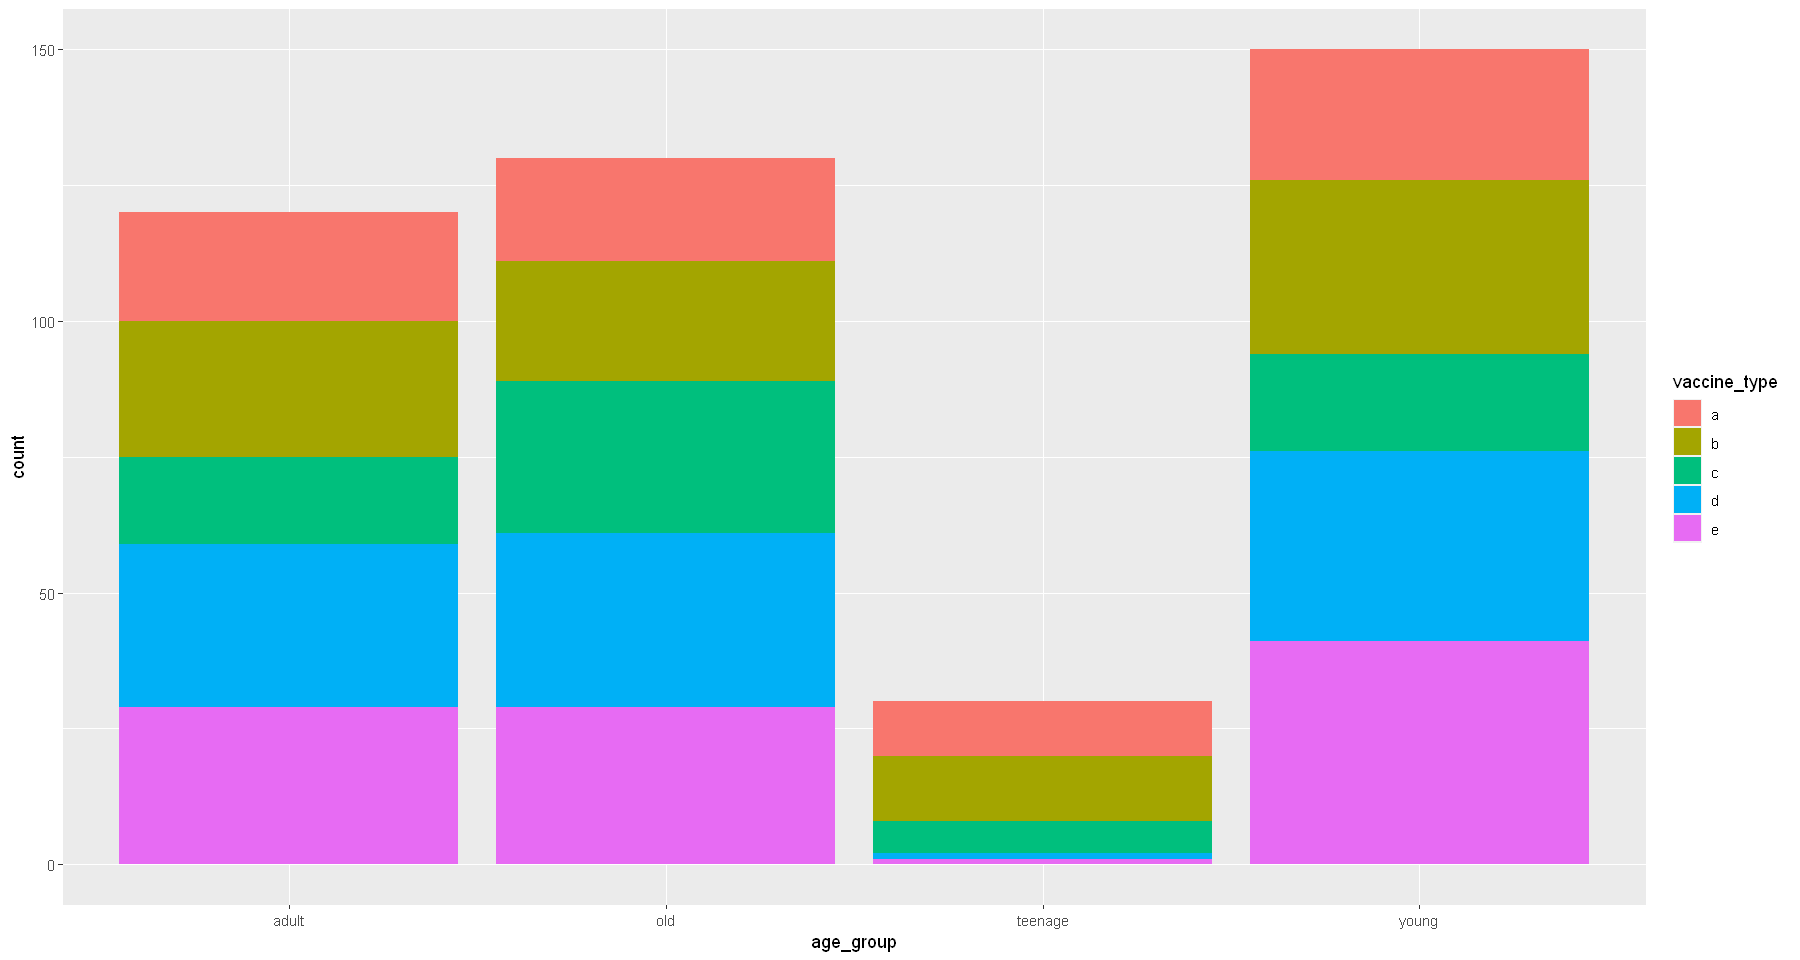

  adult old teenage young
a    20  19      10    24
b    25  22      12    32
c    16  28       6    18
d    30  32       1    35
e    29  29       1    41


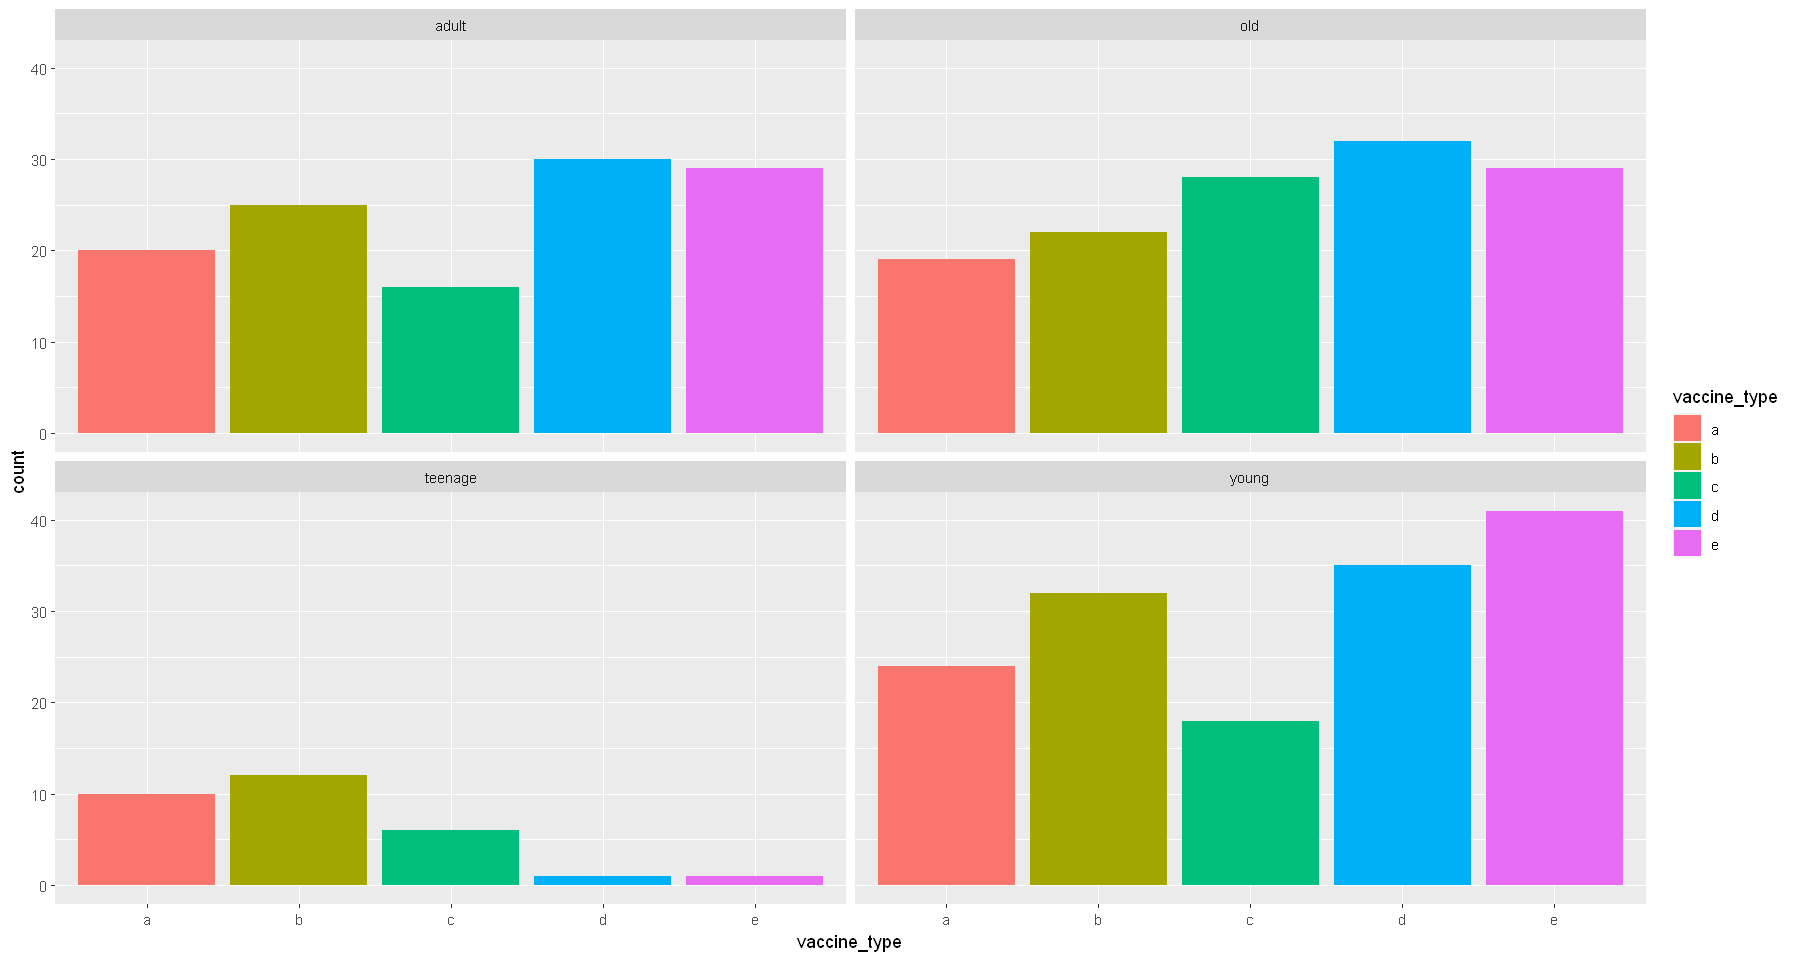

In [5]:
library(dplyr)
library(ggplot2)
vaccination_data <- read.csv("vaccination.csv", header = TRUE)
# https://stackoverflow.com/a/67826564/4213397
# https://ggplot2.tidyverse.org/reference/geom_bar.html
# https://www.marsja.se/r-add-column-to-dataframe-based-on-other-columns-conditions-dplyr/
classifier <- function(age) {
    if (12 <= age && age < 18) {
        return("teenage")
    }
    if (18 <= age && age < 40) {
        return("young")
    }
    if (40 <= age && age < 70) {
        return("adult")
    }
    return("old")
}
vaccination_data <- vaccination_data %>%
    mutate(age_group = sapply(age, function(i) classifier(i)))
print(ggplot(vaccination_data, aes(age_group)) +
    geom_bar(aes(fill = vaccine_type)))
print(ggplot(vaccination_data, aes(vaccine_type)) +
    geom_bar(aes(fill = vaccine_type)) + facet_wrap(vars(age_group)))
observations <- sapply(sort(unique(vaccination_data$age_group)), function(age_g) {
    return(sapply(sort(unique(vaccination_data$vaccine_type)), function(vac_type) {
        return(nrow(vaccination_data[vaccination_data$vaccine_type == vac_type & vaccination_data$age_group == age_g,]))
    }))
})
print(observations)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        به کمک آزمون فرض مناسب بررسی کنید که آیا گروه سنی افراد از نوع واکسن تزریق شده به آنها مستقل است یا خیر.
    </font>
</div>

In [11]:
# We use chi-test
observations <- matrix(observations, ncol = length(unique(vaccination_data$age_group)))
row_margin <- rowSums(observations)
column_margin <- colSums(observations)
total <- sum(observations)
expected <- observations
for (i in 1:nrow(observations)) {
    for (j in 1:ncol(observations)) {
        expected[i, j] <- row_margin[i] * column_margin[j] / total
    }
}
stat <- sum((observations - expected)^2 / expected)
p_value <- 1 - pchisq(stat, (nrow(observations) - 1) * (ncol(observations) - 1))
cat("p value of chi-test is", p_value, "\n")
if (p_value > 0.05) {
    print("We can't reject null hypothesis")
} else {
    print("We have rejected null hypothesis (they are dependant)")
}

p value of chi-test is 0.005538285 
[1] "We have rejected null hypothesis (they are dependant)"


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            تخمین‌گرهای واریانس
        </font>
        <hr>
             در این سوال به بررسی دو تخمین‌گر رایج واریانس می‌پردازیم. اولین تخمین‌گر مربوط به MLE است:
    </font>
</div>


$$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2$$


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        تخمین‌گر بعدی شامل تصحیح بسل(bessel's corrextion) می‌باشد:
    </font>
</div>

$$\hat{\sigma^2} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$$

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                نمونه‌هایی از یک توزیع 
                Normal(2, 2)
                با اندازه ۲ تا ۱۰۰۰ تولید کرده و برای هر  کدام  بایاس را محاسبه کنید.
            </li>
        </ul>
	</font>
</div>

In [7]:
library("ggplot2")
library("reshape2")
simulator1 <- function(data) {
    return(sum((data - mean(data))^2) / (length(data)))
}
simulator2 <- function(data) {
    return(sum((data - mean(data))^2) / (length(data) - 1))
}
true_variance <- 2^2
data <- lapply(2:1000, function(i) rnorm(i, mean = 2, sd = sqrt(true_variance)))
simulator1_bias <- sapply(data, function(i) simulator1(i) - true_variance)
simulator2_bias <- sapply(data, function(i) simulator2(i) - true_variance)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                 حال این مقادیر را در نمودار رسم کنید.
            </li>
            <li>
با توجه به این نمودار ها آیا این دو تخمین‌گر سازگار هستند؟
            </li>
        </ul>
	</font>
</div>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



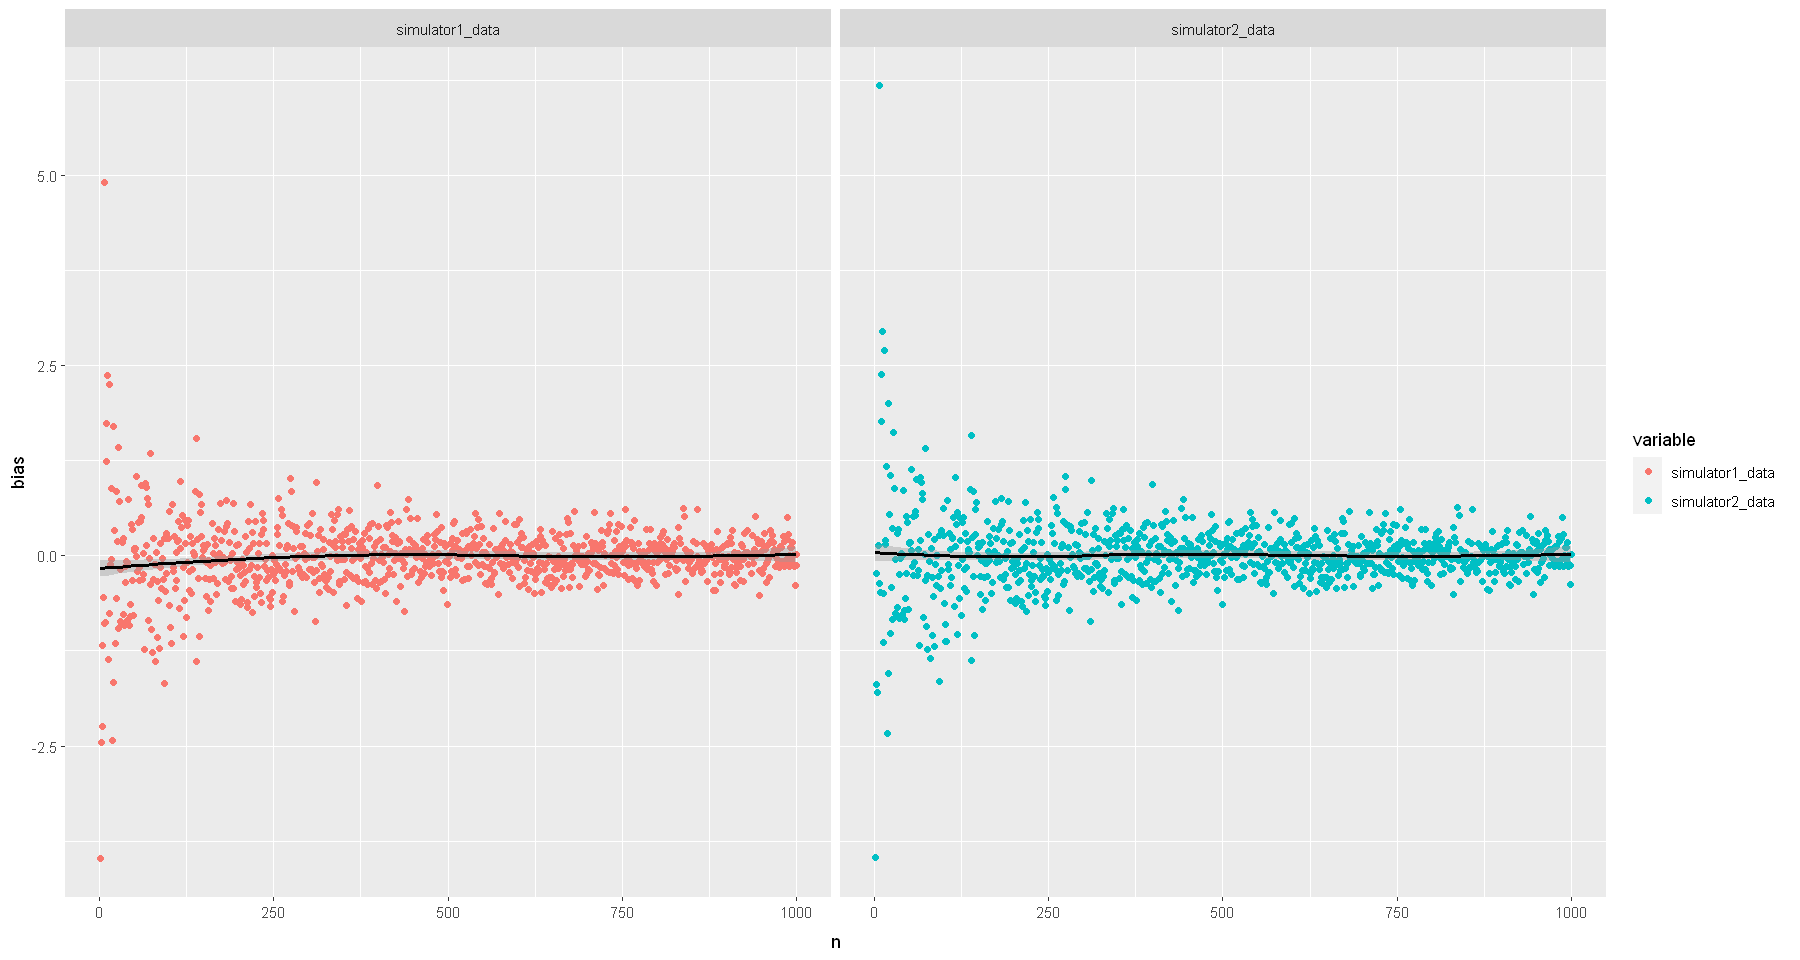

In [8]:
bias_data <- data.frame(n = 2:1000, simulator1_data = simulator1_bias, simulator2_data = simulator2_bias)
bias_data <- melt(bias_data, value.name = "bias", id = "n")
print(ggplot(bias_data, aes(n, bias, colour = variable)) +
  geom_point() + geom_smooth(colour = "black") + facet_wrap(vars(variable)))

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ: بله سازگار هستند چون در بینهایت به صفر میل میکنند.
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                 این بار صد هزار نمونه ده‌تایی از همان توزیع تولید کنید و میانگین بایاس را محاسبه کنید.
            </li>
            <li>
                با توجه به این مقادیر آیا این دو تخمین‌گر unbiased هستند؟
            </li>
        </ul>
	</font>
</div>

In [9]:
data <- lapply(1:10000, function(i) rnorm(10, mean = 2, sd = sqrt(true_variance)))
simulator1_bias <- mean(sapply(data, function(i) simulator1(i) - true_variance))
simulator2_bias <- mean(sapply(data, function(i) simulator2(i) - true_variance))
cat("simulator1 bias is", simulator1_bias, "\n")
cat("simulator2 bias is", simulator2_bias, "\n")

simulator1 bias is -0.4158236 
simulator2 bias is -0.01758174 


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ: تخمین گر اول بایاس دارد ولی تخمین گر دوم unbiased است.
	</font>
</div>